# Coding the Monty Hall Problem

You’re on Let’s Make A Deal! Your host, Monty Hall, shows you three doors. Behind 2 doors is a goat, behind the final door is a brand new car. You select a door, but before you open it, Monty shows you a goat behind a different door, and offers you the chance to change your mind to the remaining unopened door.

What is the probability that you win the car?




First off, let's import **random** and **matplotlib**. We will run this simulation 1 million times and work out the chance at winning when the player twists (or switches) to the unselected door.

In [1]:
import random
import matplotlib.pyplot as plt

numGames = 500000
wins = 0
outcomes = []

def get_round_doors():
    carIndex = random.randint(0, 2)
    doors = [0, 0, 0]
    doors[carIndex] = 1
    return doors

def get_goat_from_different_door(doors, pick):
    for i in range(len(doors)):
        if doors[i] == 0 and i != pick:
            return i


Set the switch to True if the player always switches, False if the player doesn't switch. Next, we record win (1) or loss (0) in outcomes

In [2]:
switch = True  # Set to True if the player always switches, False if the player doesn't switch

for i in range(1, numGames):
    pick = random.randint(0, 2)
    doors = get_round_doors()

    guaranteed_goat_position = get_goat_from_different_door(doors, pick)
    if switch:
        pick = 3 - pick - guaranteed_goat_position

    # Record win (1) or loss (0) in outcomes
    if doors[pick] == 1:
        wins += 1
        outcomes.append(1)  # Win
    else:
        outcomes.append(0)  # Loss

Then, we can calculate the probabilities for wins and losses

In [3]:
losses = outcomes.count(0) / numGames
win_probability = outcomes.count(1) / numGames

Finally, we can plot a bar chart using **plt.bar** to show the probability of outcomes when the player always chooses to twist (change)

<BarContainer object of 2 artists>

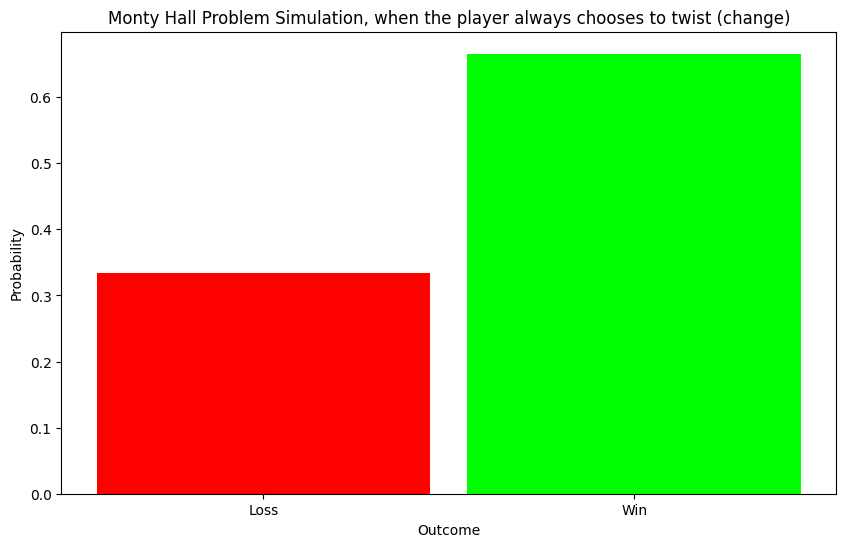

In [16]:
plt.figure(figsize=(10, 6))
plt.title("Monty Hall Problem Simulation, when the player always chooses to twist (change)")
plt.xlabel("Outcome")
plt.ylabel("Probability")
#plt.xticks([0, 1], ["Loss", "Win"])
plt.bar([0, 1], [losses, win_probability], color = ['#FF0000', '#00FF00'], width = 0.9, tick_label = ["Loss", "Win"])

As we've discussed, the probability of winning when you twist should be around **2/3** or **66.66%**. Does your plot recreate this?